# Método de Runge-Kutta de Quarta Ordem com Quatro Estágios (RK44)

Considere o problema de valor inicial dado por

\begin{equation}
  \begin{cases}
    \dot{y}(t) = f(t, y(t)) \\
    y(t_0) = y_0,
  \end{cases}
  t \in [t_0,t_f]
\end{equation}

Seja $y_{k+1}$ uma aproximação para $y(t_{k+1})$, para $t_{k+1} \in ]t_0, tf]$. O método RK44 oferece a seguinte aproximação para um dado tamanho de intervalo $h$:

\begin{equation}
  y_{k+1} = \dfrac{\kappa_1 (t_k, y_k) + 2 \kappa_2 (t_k, y_k) + 2 \kappa_3 (t_k, y_k) + \kappa_4 (t_k, y_k)}{6},
\end{equation}

onde

\begin{align*}
  \kappa_1 (t_k, y_k) &= f(t_k, y_k) \\
  \kappa_2 (t_k, y_k) &= f\left(t_k + \frac{h}{2}, y_k + \frac{h}{2} \kappa_1 (t_k, y_k)\right) \\
  \kappa_3 (t_k, y_k) &= f\left(t_k + \frac{h}{2}, y_k + \frac{h}{2} \kappa_2 (t_k, y_k)\right) \\
  \kappa_4 (t_k, y_k) &= f\left(t_k + h, y_k + h \kappa_3 (t_k, y_k)\right) \\
\end{align*}

Veja que:
- $\kappa_1$ é a inclinação no início do intervalo;
- $\kappa_2$ é a inclinação no ponto médio do intervalo, usando $\kappa_1$ para determinar $y(t_n+\frac{h}{2})$ usando o _método de Euler_;
- $\kappa_3$ é novamente a inclinação no ponto médio do intervalo, mas agora usando $\kappa_2$ para encontrar $y$;
- $\kappa_4$ é a inclinação no final do intervalo.

Usaremos o NumPy para fazer o cálculo vetorial.

In [106]:
import numpy as np
import matplotlib.pyplot as plt

Utilizando a estrutura dada no início para o método RK44, vamos fazer uma função para aplicá-la. Tal função precisa receber o valor inicial $y_0$, o intervalo de integração $[t_0, tf]$, a função $f(t, y(t))$ e a quantidade de intervalos $n$ de $[t_0, t_f]$. O tamanho de passo $h$ será calculado da seguinte forma:
$$
h = \dfrac{t_f - t_0}{n}
$$

In [107]:
def runge_kutta_44 (y0, f, t0, tf, n):
  # Lista para salvar os valores aproximados da solucao
  y_ks = [y0]

  # Calcula o tamanho do passo
  h = (tf - t0)/n

  # Determina as variaveis com os valores iniciais
  tk = t0
  yk = y0

  # Agora aplica
  for _ in range(n):
    
    # Para cada passo, precisa calcular os kappa
    kappa_1 = f(tk, yk)
    kappa_2 = f(tk + h/2, yk + h*kappa_1/2)
    kappa_3 = f(tk + h/2, yk + h*kappa_2/2)
    kappa_4 = f(tk + h, yk + h*kappa_3)

    # Aplicando o metodo, ja substituindo y_{k} = y_{k+1}
    yk = yk + h*(kappa_1 + 2*kappa_2 + 2*kappa_3 + kappa_4) / 6

    # Salva a aproximacao
    y_ks.append(yk)

    # O proximo instante calculado sera o anterior + h
    tk = tk + h

  return y_ks

A princípio, vamos testar em $\mathbb{R}$, e para isso é bom usar uma E.D.O. que sabemos calcular a solução analítica. Por exemplo:
\begin{equation}
  \begin{cases}
    y'(t) = \sin^2 (t) \\
    y(0) = 1,
  \end{cases}
\end{equation}
cuja solução é $y(t) = \frac{1}{2} (t - \sin(t)\cos(t) + 2)$, para $t \in \mathbb{R}$.

In [108]:
f = lambda t,y: np.sin(t)**2                        # Funcao
y0 = 1                                              # Valor inicial
y = lambda t: 0.5 * (t - np.sin(t) * np.cos(t) + 2) # Solucao
t0, tf = 0, 10                                      # Intervalo
n = 20                                              # Qntd de passos
h = (tf - t0)/n                                     # Tamanho do passo
I = np.arange(t0, tf+h, h)                          # Valores de t no intervalo

Aplicando:

In [109]:
valores_aproximacao = runge_kutta_44(y0, f, t0, tf, n)

Agora podemos comparar com a solução no mesmo intervalo:

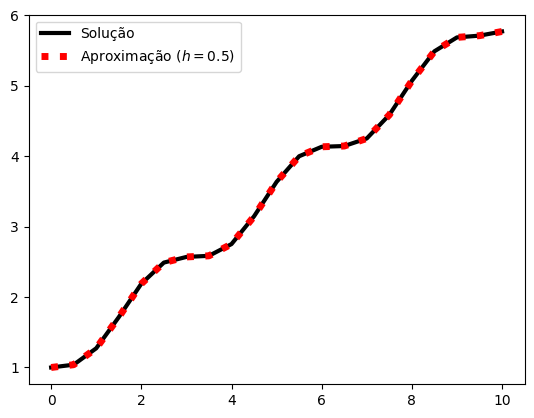

In [110]:
plt.plot(I, y(I), label="Solução", lw=3, c="black")
plt.plot(I, valores_aproximacao, label=f"Aproximação ($h={h}$)", linestyle=":",lw=5,c="red")
plt.legend()
plt.show()

Vamos conferir o erro em cada instante:

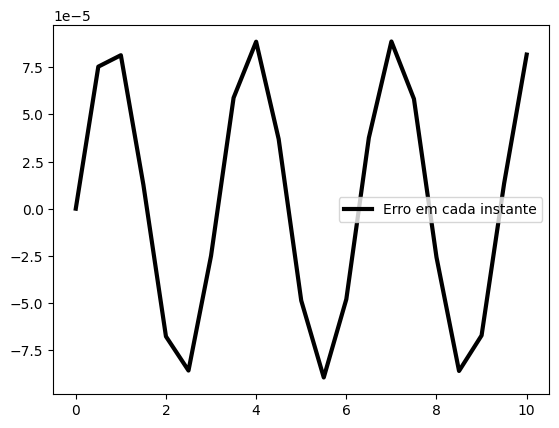

In [111]:
erro = y(I) - np.array(valores_aproximacao)

plt.plot(I, erro, label="Erro em cada instante", lw=3, c="black")
plt.legend()
plt.show()

Vamos testar com diferentes quantidades de passo para conferir se parece ou não haver convergência:

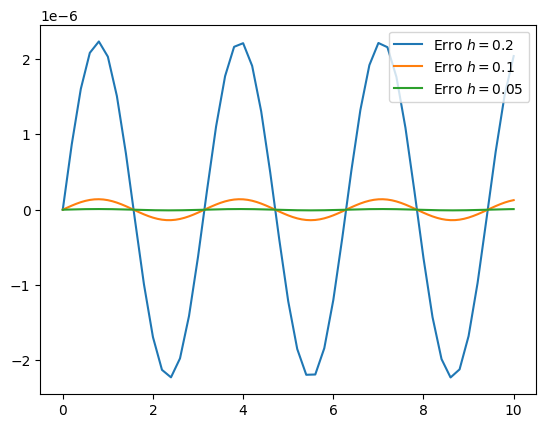

In [112]:
for qntd in [50,100,200]:
  h = (tf - t0)/qntd
  I = np.arange(t0, tf+h, h)
  valores_aproximacao = runge_kutta_44(y0, f, t0, tf, qntd)
  erro = y(I) - np.array(valores_aproximacao)
  plt.plot(I, erro, label=f"Erro $h={h}$")
plt.legend()
plt.show()

Veja que conforme $h$ diminui, o erro também. Isso **indica** que está havendo, de fato, convergência. Resta conferir se a convergẽncia é com a ordem desejada. Isto pode ser feito observando a aproximação final oferecida por cada tamanho de passo da seguinte maneira.

O método ser de ordem 4 significa que dado um tamanho de passo $h$ e uma aproximação $y_h$ respectiva, existe uma constante $C > 0$ independente de $h$ tal que
$$
|| y - y_h || \leq C h^4.
$$

Para testar se procede, podemos definir dois passos $h_1 = 2 h_2$ e aproximações respectivas $y_1$ e $y_2$, e nesse caso esperamos que
$$
|| y - y_1 || \leq C h_1^4,
\quad
|| y - y_2 || \leq C h_2^4.
$$

Fazendo a razão de um pelo outro, temos:
$$
\dfrac{|| y - y_2 ||}{|| y - y_1 ||} \approx \dfrac{C h_2^4}{C h_1^4} = \dfrac{(2 h_1)^4}{h_1^4} = 2^4
$$
$$
\therefore \log_2\left(\dfrac{|| y - y_2 ||}{|| y - y_1 ||}\right) \approx 4.
$$

Assim, depois dos cálculos podemos testar se isso realmente procede.

In [147]:
yk_1 = []
for n in [2**i for i in range(11)]:
  h = (tf-t0)/n
  yk = runge_kutta_44(y0, f, t0, tf, n)[-1]
  yk_1.append([h,yk])
  
sol = y(tf)
for i,[h_i,yk_i] in enumerate(yk_1[1:]):
  erro = abs(sol - yk_i)
  h_ant, y_ant = yk_1[i]
  erro_ant = abs(sol-y_ant)
  print(np.log2(erro_ant/erro))  

0.7072851862602024
2.892208149122783
5.335303826168102
4.221312026529954
4.051465218553916
4.0126496057683685
4.003149234377966
4.000784753769152
4.000206576550697
3.9999583351210988


## Exemplo mais elaborado

Vamos considerar agora o problema de N-corpos. Nesse caso, nossa função $f$ será o vetor de velocidades e o vetor de forças. Nesse caso, teremos uma EDO na forma:
$$
 (\dot{\vec x}(t), \dot{\vec v}(t)) = (\vec v(t), \vec F(t, \vec x(t)))
$$
Tomaremos as condições de um problema de 3 corpos bem conhecido, cujas trajetórias formam uma lemniscata (8 deitado). Veja que bonitinho:

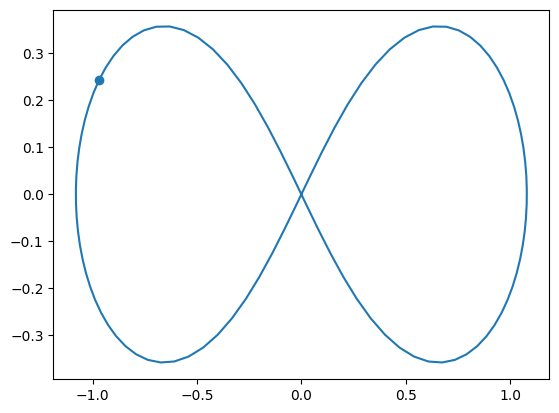

In [192]:
from auxiliares.ncorpos import F_ncorpos, valores_iniciais_lemniscata

m, r0, v0 = valores_iniciais_lemniscata()
t0, tf = 0, 6.3259

def F (t, x):
  q = int(len(x)/2)
  r,v = x[:q],x[q:]
  F_vec = np.zeros((len(x),3))
  F_vec[:q] = v[:]
  F_vec[q:] = F_ncorpos(m,r)[:]
  return F_vec

n=100
h = (tf- t0)/n
x = np.concatenate([r0, v0])
x_k = runge_kutta_44(x, F, t0, tf, n)

# Plota a trajetoria do primeiro corpo
x_k = list(zip(*x_k))
X,Y,Z = list(zip(*x_k[0]))
plt.scatter(X[0],Y[0])
plt.plot(X,Y, label=f"$h={round(h,3)}$")
plt.show()